In [1]:
print("Hello, World!")

Hello, World!


In [20]:
import NeuralImplicit
import torch
model = NeuralImplicit.Siren(in_features=2,out_features=1,hidden_features=256,hidden_layers=2,outermost_linear=True,first_omega_0=60, hidden_omega_0=60)
#model.load_state_dict(torch.load('./models/description_test.pth',weights_only=False,map_location=torch.device('cpu')))
checkpoint = torch.load('./models/description_test.pth',weights_only=False,map_location=torch.device('cpu'))

model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
print(checkpoint["extra_info"])
import mesh

#mesh.plotDisctancefunction(model)
print(model.net)
print(f"number of parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
print("Model architecture:\n")
print(model)

# --- 2️⃣ Count the number of layers ---
# Count all layers (modules excluding the root model)
num_layers = sum(1 for _ in model.modules()) - 1
print(f"\nTotal number of layers: {num_layers}")

# --- 3️⃣ (Optional) Count only trainable layers ---
trainable_layers = sum(1 for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameter tensors: {trainable_layers}")

print(f"Parameter_tensor: {list(p.shape for p in model.parameters() if p.requires_grad)}")

{'comment': 'Test for R=2'}
Sequential(
  (0): SineLayer(
    (linear): Linear(in_features=2, out_features=256, bias=True)
  )
  (1): SineLayer(
    (linear): Linear(in_features=256, out_features=256, bias=True)
  )
  (2): SineLayer(
    (linear): Linear(in_features=256, out_features=256, bias=True)
  )
  (3): Linear(in_features=256, out_features=1, bias=True)
)
number of parameters: 132609
Model architecture:

Siren(
  (net): Sequential(
    (0): SineLayer(
      (linear): Linear(in_features=2, out_features=256, bias=True)
    )
    (1): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (2): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (3): Linear(in_features=256, out_features=1, bias=True)
  )
)

Total number of layers: 8
Number of trainable parameter tensors: 8
Parameter_tensor: [torch.Size([256, 2]), torch.Size([256]), torch.Size([256, 256]), torch.Size([256]), torch.Size([256, 256]), torch.Size([2

1.9108076095581055
tensor([1.], grad_fn=<WhereBackward0>)


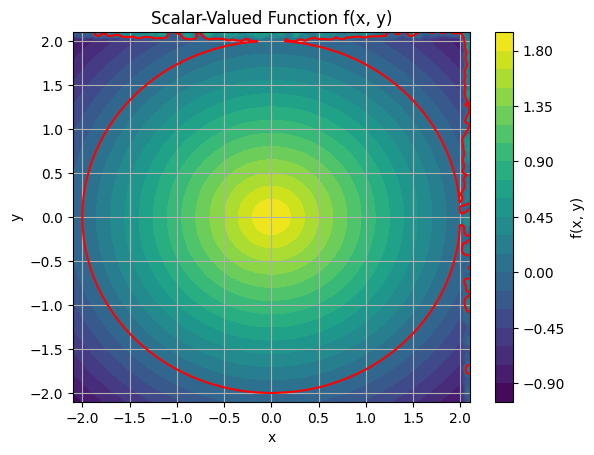

In [13]:
import NeuralImplicit
import torch
md = NeuralImplicit.Siren(in_features=2, out_features=1, hidden_features=256,hidden_layers=2, outermost_linear=True, first_omega_0=60, hidden_omega_0=60)
md.load_state_dict(torch.load('./models/double_circle_test.pth',weights_only=True,map_location=torch.device('cpu')))
md.eval()
import mesh
print(md(torch.zeros(1,2)).item())
print(mesh.distanceFromContur(0,0,md,transform="trapezoid"))
mesh.plotDisctancefunction(md)

In [ ]:
torch.save({
    "model_state_dict": siren_model.state_dict(),
    "epoch": current_epoch,
    "loss": current_loss,
    "architecture": "SIREN",
    "extra_info": {
        "dataset": "L-shape",
        "author": "your_name",
        "date": "2025-10-06"
    }
}, "siren_model_L-shape_qvad.pth")



checkpoint = torch.load("siren_model_L-shape_qvad.pth")
siren_model.load_state_dict(checkpoint["model_state_dict"])
epoch = checkpoint["epoch"]
metadata = checkpoint["extra_info"]
